# Training

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
%run lib2 --area_id=3 --bs=32 --num_workers=8 --num_slice=25 --gpu_start=4 --num_gpus=2

In [4]:
trn_csv = pd.read_csv(PATH/DATA_PATH/FMT_VALTRAIN_FN)
val_csv = pd.read_csv(PATH/DATA_PATH/FMT_VALTEST_FN)
trn_image_ids = trn_csv['ImageId'].tolist()
val_image_ids = val_csv['ImageId'].tolist()

trn_y = load_y(trn_image_ids, FMT_VALTRAIN_MASK_STORE)
val_y = load_y(val_image_ids, FMT_VALTEST_MASK_STORE)

trn_names = [str(o) + '.png' for o in trn_image_ids]
val_names = [str(o) + '.png' for o in val_image_ids]

In [5]:
stats = get_rgb_mean_stat(area_id)
aug_tfms = transforms_top_down
for o in aug_tfms: o.tfm_y = TfmType.CLASS
tfms = tfms_from_stats(stats, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)
# empty = ['empty'] * 2
trn = (trn_names, trn_y)
val = (val_names, val_y)
test = None
datasets = ImageData.get_ds(OptionalFilesArrayDataset, trn, val, tfms,
                            test=test, path=PATH/DATA_PATH/TRN, num_slice=num_slice, pad=False)
md = ImageData(str(PATH), datasets, bs, num_workers=num_workers, classes=None)
denorm = md.trn_ds.denorm

In [ ]:
model = get_model()

In [ ]:
learn = get_learn(md, model, load_weight=True)

In [7]:
x, y = learn.data.val_dl.get_batch(range(num_slice*4))
x = denorm(x)

In [16]:
%%time
n = 4
x_big = put_back_parallel(x, padded=False)
y_big = put_back_parallel(y, padded=False)
x_big = [o.squeeze() for o in x_big]
y_big = [o.squeeze() for o in y_big]

CPU times: user 401 ms, sys: 192 ms, total: 593 ms
Wall time: 125 ms


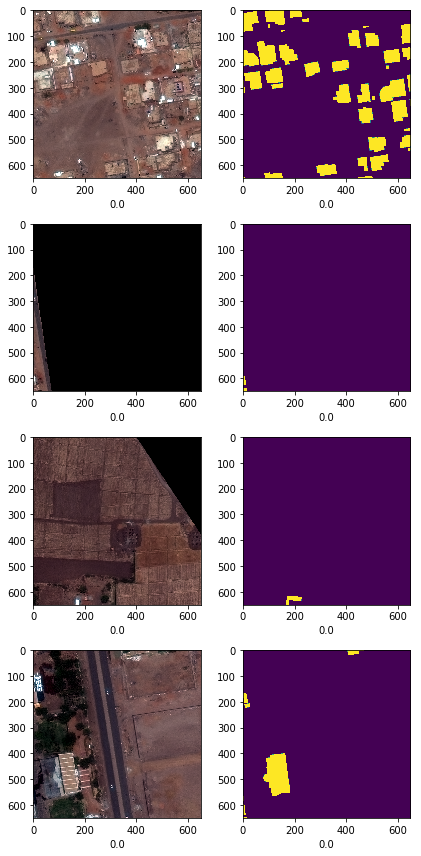

In [17]:
im_data = zip(x_big, y_big)
plot_ims(im_data)

 86%|████████▌ | 237/277 [03:58<00:40,  1.01s/it, loss=4.8] 

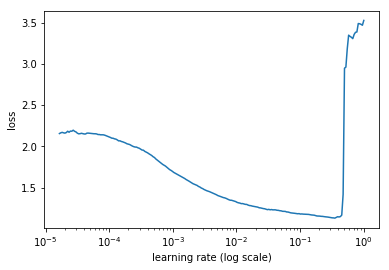

In [18]:
learn.lr_find()
learn.sched.plot()

In [23]:
lr=4e-2
wd=1e-7
lrs = np.array([lr/3,lr])/2

In [24]:
learn.fit(lr,1, wds=wd, cycle_len=4,use_clr=(20,8), best_save)

  0%|          | 0/277 [00:00<?, ?it/s]                    


Exception in thread Thread-531:
Traceback (most recent call last):
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.970703   0.907288   0.899136   0.525935  
    1      0.963007   0.882724   0.898159   0.537539         
    2      0.948513   0.87704    0.897105   0.539019         
    3      0.948764   0.885786   0.890043   0.539341         



[array([0.88579]), 0.8900427646385995, 0.5393409526605448]

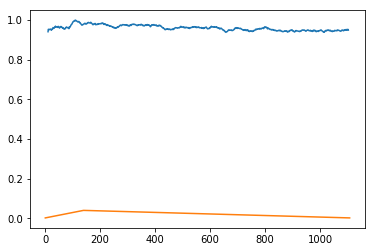

In [28]:
learn.save('unet-5')

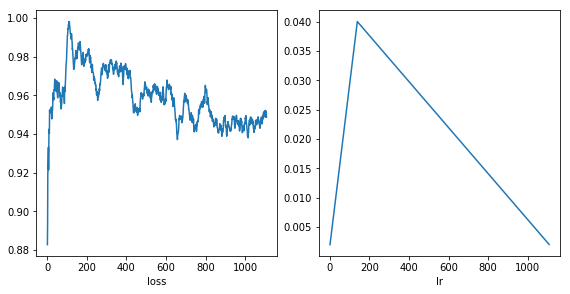

In [32]:
plot_lr_loss(learn)

In [33]:
lrs /= 4

In [35]:
learn.fit(lr,1, wds=wd, cycle_len=8,use_clr=(20,8), best_save_name='unet-5')

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.974077   0.94483    0.87289    0.524966  
    1      0.957839   0.880037   0.901032   0.537577         
    2      0.956195   0.878927   0.89436    0.541803         
    3      0.940493   0.862092   0.899786   0.544635         
    4      0.941547   0.875981   0.904219   0.535988         
    5      0.939015   0.864269   0.896612   0.545528         
    6      0.930851   0.883011   0.890836   0.541222         
    7      0.938207   0.861064   0.898069   0.545646         



[array([0.86106]), 0.8980688334766187, 0.5456463166606272]

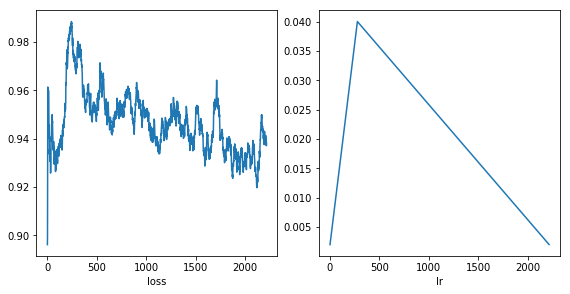

In [36]:
plot_lr_loss(learn)

In [37]:
learn.save('unet-5-0')

In [7]:
lr=4e-2
wd=1e-7
lrs = np.array([lr/3,lr])/2
lrs /= 4
lrs /= 5

In [8]:
learn.fit(lr,1, wds=wd, cycle_len=8,use_clr=(20,8), best_save_name='unet-5')

  0%|          | 1/554 [00:13<2:04:30, 13.51s/it, loss=0.9]

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58